# Lecture 7: Discrete Random Variables and Distributions 
***

In this notebook we'll get some more practice with discrete random variables and see how we can play with binomial distributions using Python.   

We'll need Numpy and Matplotlib for this notebook, so let's load them.  We'll also need SciPy's binom function for computing binomial coefficients and the itertools package for finding combinations.   

In [149]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt 
from scipy.special import binom
import itertools
%matplotlib inline

### Exercise 1 - Loaded Dice 
*** 

Consider a loaded six-sided die.  

**Part A**: Suppose that the die is loaded such that you are twice as likely to roll either a $1$, $2$, or $3$, than you are to roll either a $4$, $5$, or $6$. Let $X$ be a random variable describing the die.  What is the probability mass function for $X$? 

***
**Solution**: Let's write down the relationship between the probabilities of each of the values of $X$.  We have 

$$
p(1) = p(2) = p(3) = 2p(4) = 2p(5) = 2p(6)
$$

Next we write down the condition that the probabilities must sum to 1.  We have 

$$
1 = p(1) + p(2) + p(3) + p(4) + p(5) + p(6) 
$$

Writing each probability in terms of $p(1)$ from the first set of equations, we have 

$$
1 = p(1) + p(1) + p(1) + \frac{1}{2}p(1) + \frac{1}{2}p(1) + \frac{1}{2}p(1) = \frac{9}{2}p(1)
$$

Solving for $p(1)$ we have 

$$
p(1) = \frac{2}{9}
$$

Plugging this into the relationships with $p(1)$, we have 

\begin{array}{c|ccccc}
a & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline
p(a) & \frac{2}{9} & \frac{2}{9} & \frac{2}{9} & \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\end{array}

***

**Part B**: Find the cumulative distribution function for $X$.  What is the probability that you roll a $4$ or lower with the loaded die? 

***
**Solution**: The cumulative distribution function is 

\begin{array}{c|ccccc}
a & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline
F(a) & \frac{2}{9} & \frac{4}{9} & \frac{6}{9} & \frac{7}{9} & \frac{8}{9} & 1 \\
\end{array}

The probability that we roll a 4 or lower is then 

$$
F(4) = P(X \leq 4) = \frac{7}{9}
$$

***

### Exercise 2 - Implementing and Sampling the Binomial Distribution 
***

**Part A**: Write a function that takes in the parameters of the binomial distribution, $n$ and $p$, and returns the probability mass function as a Numpy array. In order to get the coefficient in the binomial distribution, you'll need a way to compute ${n \choose k}$.  You can do this from scratch using Python's factorial function, or you can get the value directly using Scipy's canned function [binom](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.binom.html).  

In [13]:
def binomial_pmf(n, p):
    
    pmf = np.array([binom(n,k) * p**k * (1-p)**(n-k) for k in range(n+1)])
    
    return pmf 

pmf = binomial_pmf(10, 0.5)
print(" k | p(k)")
print("-----------")
for k, prob in enumerate(pmf):
    print("{:2d} | {:.4f}".format(k, prob))

 k | p(k)
-----------
 0 | 0.0010
 1 | 0.0098
 2 | 0.0439
 3 | 0.1172
 4 | 0.2051
 5 | 0.2461
 6 | 0.2051
 7 | 0.1172
 8 | 0.0439
 9 | 0.0098
10 | 0.0010


**Part B**: So now you know the exact distribution of a binomial random variable, but very frequently we'll want to generate samples from that distribution.  You can do that with Numpy's [binomial](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.binomial.html) function. Read the documentation, and then try drawing 20 samples from _Bin(n,p)_ for $n=10$ and $p=0.25$.  

In [15]:
x = np.random.binomial(10, 0.25, size=20)
print(x)

[3 2 3 3 1 1 5 2 3 1 2 6 5 2 4 1 1 4 1 6]


**Part C**: We can approximate the pmf of _Bin(n,p)_ by drawing many many samples from the distribution and plotting a **density** histogram.  Do this now.  Additionally, use the function you wrote in **Part A** to get the exact density, and plot the distribution directly below the histogram of your sampled distribution.  How do they compare?  What happens if you use more or fewer samples in the histogram? 

***
**Solution**: The following function makes the desired plots: 

In [182]:
def sampling_vs_pmf(n, p, sample_size):    

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,10))

    # Plot histogram of samples 
    df = pd.DataFrame(np.random.binomial(n, p, sample_size))
    df.hist(ax=axes[0], bins=[ii-.5 for ii in range(11+1)], rwidth=0.8, normed=True, color="steelblue")
    axes[0].set_ylabel('Density', fontsize=16)
    axes[0].set_xlabel(r'$X$', fontsize=16)
    axes[0].set_ylim([0,0.40])
    axes[0].set_title("Density Histogram of Bin(10,0.25) Samples", fontsize=16)
    axes[0].grid(alpha=0.25)
    axes[0].set_axisbelow(True)
    axes[0].set_xticks(list(range(0,11)))

    # Plot the exact pmf of the binomial distribution 
    X = np.array(range(0,10+1))
    pmf = binomial_pmf(10, .25)
    axes[1].bar(X, pmf, color="steelblue")
    axes[1].set_ylim([0,0.40])
    axes[1].set_ylabel('PMF', fontsize=16)
    axes[1].set_xlabel(r'$X$', fontsize=16)
    axes[1].set_title("Probability Mass Function for Bin(10,0.25)", fontsize=16)
    axes[1].grid(alpha=0.25)
    axes[1].set_axisbelow(True)
    axes[1].set_xticks(list(range(0,11)));

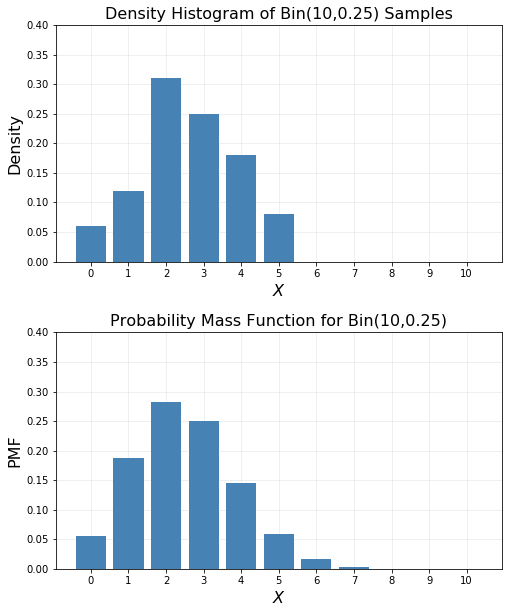

In [183]:
sampling_vs_pmf(10, 0.25, 100)

The plot above compares the true PMF to the density histogram of $100$ samples from $Bin(10,0.25)$.  They don't look ver much alike do they?  Let's try it with many more samples. 

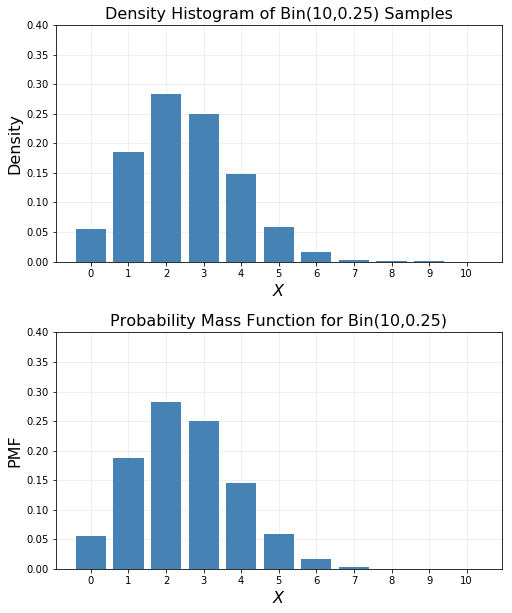

In [184]:
sampling_vs_pmf(10, 0.25, 10000)

With $10K$ samples the density histogram and the PMF are nearly indistinguishable. 
***

### Exercise 3 - Predicting Play-off Winners 
***

In this exercise we'll look at the probability of your favorite sports team winning a best-of-7 play-off series. Suppose your team is the slight favorite in the series and in each individual game has a probability of winning of $p = 0.55$. 

**Part A**: What is the probability that your team wins the series? 

***
**Solution**: To win a 7-game series your team needs to win 4 games.  Naturally, whenever a team wins a series, the last win must come in the last game played.  This can either happen on the 4th, 5th, 6th, or 7th game.  Let's consider these cases one by one. 

**Win on 4th Game**: If your team wins the series on the 4th game, then they won all 4 games.  The probability that this happens is 

$$
P(\textrm{Win on 4th Game}) = p^4 = {3 \choose 3}p^3 \cdot p 
$$

**Win on 5th Game**: If your team wins the series on the 5th game, then they won 3 of the first 4 games, and then  won the 5th game.  (Note, they can't win the first 4 games, because then they would have won the series on the 4th game).  Thus, we have 

$$
P(\textrm{Win on 5th Game}) = {4 \choose 3} \cdot p^3(1-p) \cdot p 
$$

**Win on 6th Game**: If your team wins the series on the 6th game, then they won 3 of the first 5 games, and then  won the 6th game.  

$$
P(\textrm{Win on 6th Game}) = {5 \choose 3} \cdot p^3(1-p)^2 \cdot p 
$$

**Win on 7th Game**: If your team wins the series on the 7th game, then they won 3 of the first 6 games, and then  won the 7th game.  

$$
P(\textrm{Win on 7th Game}) = {6 \choose 3} \cdot p^3(1-p)^3 \cdot p 
$$

**Win the Series**: Thus we have 

$$
P(\textrm{Win the Series}) = {3 \choose 3}\cdot p^3\cdot p + {4 \choose 3} \cdot p^4(1-p) + {5 \choose 3} \cdot p^4(1-p)^2 + {6 \choose 3} \cdot p^4(1-p)^3 \approx 0.608
$$


The following functions carry out this computation: 

In [94]:
def p_binom(n, k, p):
    return binom(n, k) * (p**k) * (1-p)**(n-k)

def p_win_series(series_length=7, p=0.5):
    wins_req = series_length//2 + 1 
    prob = p*np.sum([p_binom(n,wins_req-1,p) for n in range(wins_req-1,series_length)])
    return prob
    
print("P(Win Best-of-7) = {:.3f}".format(p_win_series(7, 0.55)))

P(Win Best-of-7) = 0.608


So it looks like your team will win the series with probability $0.608$. 
***

**Part B**: How often will a 45%-to-55% underdog win a best-of-7 series?  Is an underdog more likely to win a series if it's shorter, say best-of-5 or best-of-3? 

***
**Solution**: We can use the function we wrote in **Part A** to investigate this.  We have 

In [95]:
print("P(Win Best-of-7) = {:.3f}".format(p_win_series(7, 0.45)))
print("P(Win Best-of-5) = {:.3f}".format(p_win_series(5, 0.45)))
print("P(Win Best-of-3) = {:.3f}".format(p_win_series(3, 0.45)))

P(Win Best-of-7) = 0.392
P(Win Best-of-5) = 0.407
P(Win Best-of-3) = 0.425


It looks like, for the underdog, the chances of winning the series go up as the series gets shorter.  This should make intuitive sense.  If it was a 1-game series the underdogs would win 45% of the time.  As the series gets longer their chances go down because the better team is more likely to win more games in the long-run. 
***

This example is not particularly realistic because it does not consider home-field advantage.  Typically teams will play better (and thus have a higher probability of winning) when they play at their home field.  Suppose that your team hosts Games 1, 2, 6, and 7 at home, and plays away in Games 3, 4, and 5.  Suppose that when your team plays at home, they win with probability $p = 0.6$ and when they're on the road they win with only probability $q=0.5$.  

**Part C**: Is the probability that your team wins $k$ of the $n$ games still well-described by a binomial distribution?  Why or why not? 

***
**Solution**: Things get a little weird because the probability that your team wins changes depending on whether they're playing at home or on the road. This violates our assumption in the binomial distribution that each individual trial has the same probability of success.  We can still figure this out though. 
***

**Part D**: What is the probability that your team wins the 7-game series under the above conditions? 

***
**Solution**: This one is a bit tough to do by hand, so we'll go through the first few cases and then write a function to do the real computation. 

**Win on 4th Game**: Your team has to win all four of the games.  The first two are at home while the second two are away.  Thus we have 

$$
P(\textrm{Win on 4th Game}) = p^2q^2 = 0.09 
$$

**Win on the 5th Game**: Your team needs to win 3 of the first 4 games and then win the 5th game.  The scenarious in which your team wins 3 of the first 4 games and then wins the 5th are as follows: 

$$
\{{\bf WWWL}W, {\bf WWLW}W, {\bf WLWW}W, {\bf LWWW}W \}
$$

Associating the win probability with each game location, we have the following and summing the probability of each outcome, we have 

$$
P(\textrm{Win on 5th Game}) = 
p\cdot p\cdot q \cdot (1-q)\cdot q +
p\cdot p\cdot (1-q) \cdot q \cdot q +
p\cdot (1-p)\cdot q \cdot q \cdot q +
(1-p)\cdot p\cdot q \cdot q \cdot q = 0.15
$$

OK, so that's the gist of it.  Next we'll write a few functions to help us do the full computation.  In the first function, we compute the probability of winning $k$ of $n$ games according to the game locations.  We use the [combinations](https://docs.python.org/3/library/itertools.html#itertools.combinations) function from the [itertools](https://docs.python.org/3/library/itertools.html) package to loop over all possible combination of $k$ wins in $n$ games. Then in the second function we sum up the probability of winning $3$ of the first $n$ games and then winning the $(n+1)$st game.  

In [173]:
def prob_win_k_of_n_games(n, k, p, q, locations):
    
    # Loop over all combinations of winning k of n games 
    # and sum probabilities 
    cum_prob = 0 
    for combo in itertools.combinations(range(n), k):
        win_indices = np.array([ii in combo for ii in range(n)])
        loss_indices = np.logical_not(win_indices)
        probs = win_indices * locations[:n] + loss_indices*(1-locations[:n]) 
        cum_prob += np.prod(probs)
        
    return cum_prob 
        
def p_win_home_away_series(p, q, locations):
    return np.sum([prob_win_k_of_n_games(n-1, 3, p, q, locations)*locations[n-1] for n in range(4,8)])


Finally, we plug in the probabilities and location schedule for the given scenario.  

In [172]:
p, q = 0.6, 0.5
locations = np.array([p, p, q, q, q, p, p])
print("P(Win Best-of-7 Homefield) = {:.3f}".format(p_win_home_away_series(p,q,locations)))

P(Win Best-of-7 Homefield) = 0.624


It looks like the probability that our team wins the series with homefield advantange is approximately $0.624$. 
***

**Part E**: Now suppose that the teams are evenly matched in the sense that your team wins with probability $p=0.55$ when playing at home and wins with only probability $q = (1-p) = 0.45$ when playing away.  How much of a difference does home-field advantage make? 

***
**Solution**: We can do this one using the code we wrote in **Part D**, we just have to adjust the probabilities. 


In [176]:
p, q = 0.55, 0.45
locations = np.array([p, p, q, q, q, p, p])
print("P(Win Best-of-7 Homefield) = {:.3f}".format(p_win_home_away_series(p,q,locations)))

P(Win Best-of-7 Homefield) = 0.516


In this scenario having homefield advantage gives the team a slight edge.  Of course, for the probabilities that we assumed, it's not surprising that homefield advantage only has a slight effect.  Consider again the scenario where the teams are evenly matched, but play much better at home.  Suppose the probability of winning at home is $p = 0.9$ and probability of winning away is $q = (1-p) = 0.1$.  We then have 

In [177]:
p, q = 0.9, 0.1
locations = np.array([p, p, q, q, q, p, p])
print("P(Win Best-of-7 Homefield) = {:.3f}".format(p_win_home_away_series(p,q,locations)))

P(Win Best-of-7 Homefield) = 0.736


In this case the advantage to the team with homefield advantage is much more significant. 
***

$$
P(W) = P(W \mid E_4)P(E_4) + 
$$